#  🏠 Data Mining Questions  <a id='home'></a>

Process of knowledge discovery from our dataset.

### 🛠️ [Initial Data Pull and Setup](#data_pull)

### ❓ [Data Mining Questions](#questions)
1. [Crime has steadily decreased since 2002, but plateaued in 2016.  Why might crime have plateaued?](#q1)
2. [Crime seems to be disappearing in some areas.  Which neighborhoods have gotten safer, and what might be some of the contributing factors?](#q2)
3. [Crime dropped off significantly in April of 2020.  What were the factors involved?](#q3)


# Part 1: Initial Data Pull and Setup <a id='data_pull'></a>
Links: [🏠](#home) [❓](#questions)

## Part 1a: Imports

In [1]:
# Std lib:
import warnings
import os

# To hide environment variables
from dotenv import load_dotenv

# Data manipulation:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon

# Visualization:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('seaborn')

# Display all columns in Jupyter:
from IPython.display import display
pd.options.display.max_columns = None

# Filter Warnings
warnings.filterwarnings('ignore')

## Part 1b: Pull in the Data 

In [2]:
datatypes = {'block': 'object',
             'iucr': 'object',
             'primary_type': 'object',
             'description': 'object',
             'location_description': 'object',
             'arrest': 'bool',
             'domestic': 'bool',
             'beat': 'int64',
             'district': 'float64',
             'ward': 'float64',
             'community_area': 'int64',
             'fbi_code': 'object',
             'x_coordinate': 'float64',
             'y_coordinate': 'float64',
             'year': 'int64',
             'latitude': 'float64',
             'longitude': 'float64',
             'location': 'object',
             'month': 'uint8',
             'hour': 'uint8',
             'dayofweek': 'uint8',
             'weekend': 'bool',
             'CF': 'float64',
             'CF3': 'float64',
             'PI': 'float64',
             'EUH': 'float64',
             'CH': 'float64',
             'SOI': 'float64',
             'crime_code_category': 'category',
             'index_crime': 'bool',
             'violent_crime': 'bool',
             'property_crime': 'bool',
             'crime_against_persons': 'bool',
             'crime_against_property': 'bool',
             'crime_against_society': 'bool'}

In [3]:
load_dotenv()
path_to_data = os.environ.get('CLEAN_DATA')
df = pd.read_csv(path_to_data, dtype=datatypes)

<a id='home'></a>

### Question 1: Crime has steadily decreased since 2002, but plateaued in 2016. Why might crime have plateaued?

In [4]:
first_year = 2002
last_year = 2020
q1_df = df[df.year.isin(list(range(2002, 2020)))]

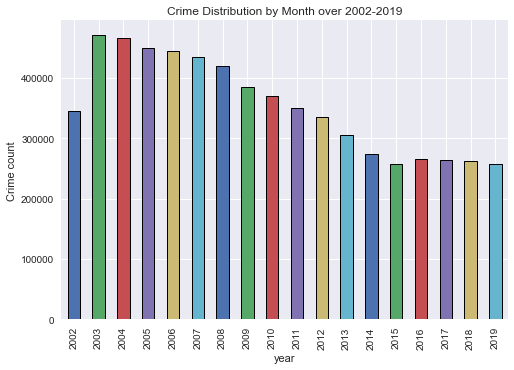

In [5]:
histoy = q1_df.groupby('year').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette())
histoy.set_title('Crime Distribution by Month over 2002-2019')
histoy.set_ylabel('Crime count');

One way to gain insight into this question is to see if crime uniformly plateaued (all individual types of crime followed the same pattern as total crime) or if we had a specific spike in one type of crime and reduction in another.

Let's look at the trends on a few individual crimes:

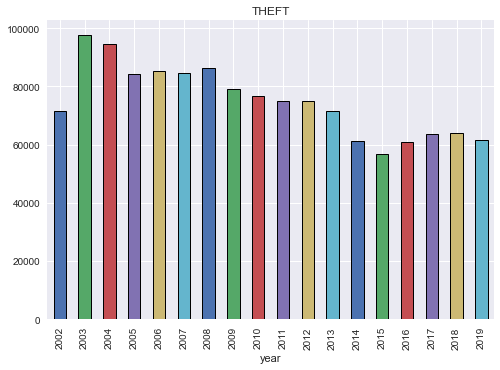

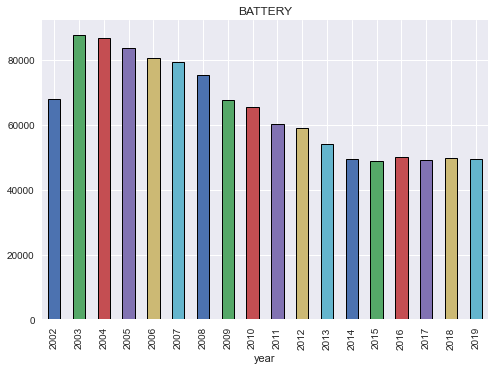

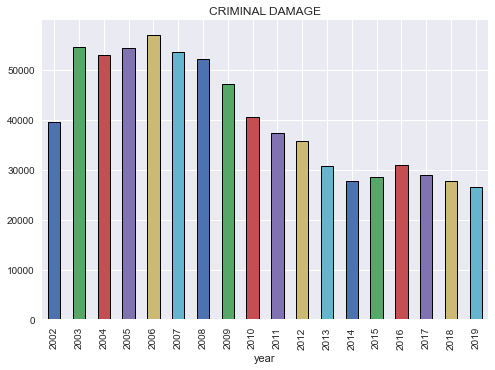

In [66]:
n = 3
top_n_crimes = q1_df.groupby('primary_type').size().sort_values(ascending=False)[:n].index.to_list()


for crime in top_n_crimes:
    q1_df[q1_df.primary_type == crime].groupby('year').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette(), title=crime)
    plt.show()

The top 3 crimes appear to show a similar trend as total crime.  How can we find out which crimes deviated the most from this trend?

In [149]:
from scipy.stats import linregress

last_4_years = np.array([2016, 2017, 2018, 2019])

df_last_4_years = q1_df[q1_df.year.isin(last_4_years)]  # look at the data from the last 4 years
ttl_crime_per_year = np.array(df_last_4_years.groupby('year').size())

linregress(last_4_years, ttl_crime_per_year)


LinregressResult(slope=-2622.0, intercept=5552767.5, rvalue=-0.9686302762237142, pvalue=0.03136972377628578, stderr=475.66048816356346)

This indicates that, during our "plateau", total crime decreased by approximately 2,622 per year.

To see which crimes had a trend that deviated most from this, let's look at some correlations

### TODO: finish this section below

In [154]:
df_last_4_years = q1_df[q1_df.year.isin([2016, 2017, 2018, 2019])]  # look at the data from the last 4 years

crime_types = df_last_4_years.primary_type.unique()

ttl_crime_per_year = np.array(df_last_4_years.groupby('year').size())

crime_to_total_crime_correlation = dict()

for crime in crime_types:
    crime_counts_per_year = np.array(df_last_4_years[df_last_4_years.primary_type == crime].groupby('year').size())
    if len(crime_counts_per_year) == len(ttl_crime_per_year):
        crime_to_total_crime_correlation[crime] = np.corrcoef(ttl_crime_per_year, crime_counts_per_year)[0, 1]
        
sorted(crime_to_total_crime_correlation.items(), key=lambda x: x[1])

[('STALKING', -0.9921262018550397),
 ('INTERFERENCE WITH PUBLIC OFFICER', -0.978089100883461),
 ('CONCEALED CARRY LICENSE VIOLATION', -0.9671772168488141),
 ('WEAPONS VIOLATION', -0.9584000339731686),
 ('CRIMINAL SEXUAL ASSAULT', -0.9580596316217502),
 ('SEX OFFENSE', -0.9490120033203504),
 ('ASSAULT', -0.895698384326383),
 ('INTIMIDATION', -0.7879169745811855),
 ('NARCOTICS', -0.6810372328803319),
 ('CRIMINAL TRESPASS', -0.6503813878229252),
 ('HUMAN TRAFFICKING', -0.525732105955812),
 ('OFFENSE INVOLVING CHILDREN', -0.37943169619689954),
 ('PUBLIC INDECENCY', -0.2555480360983454),
 ('LIQUOR LAW VIOLATION', -0.22526029700024888),
 ('OBSCENITY', -0.03598753816586275),
 ('OTHER NARCOTIC VIOLATION', -0.011687177615614063),
 ('THEFT', -0.008121973842749364),
 ('DECEPTIVE PRACTICE', 0.03537777245228413),
 ('PUBLIC PEACE VIOLATION', 0.27201037747892015),
 ('BATTERY', 0.47397374333299724),
 ('GAMBLING', 0.8088493372266512),
 ('ARSON', 0.835316715557676),
 ('KIDNAPPING', 0.8403799110482798),


This states that, in the past 4 years, burglary had a strong positive correlation with total crime whereas stalking had a strong negative correlation with total crime.  In other words, while total crime decrease slightly year over year, stalking increased significantly year over year.  Let's see some visualizations:

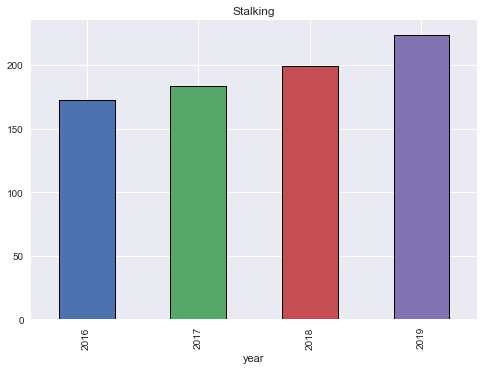

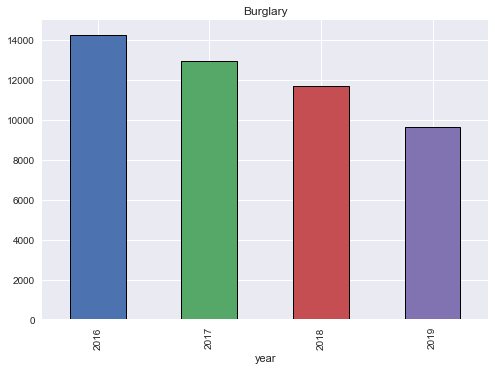

In [173]:
df_last_4_years[df_last_4_years.primary_type == 'STALKING'].groupby('year').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette(), title='Stalking')
plt.show()
df_last_4_years[df_last_4_years.primary_type == 'BURGLARY'].groupby('year').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette(), title='Burglary')
plt.show()